In [2]:
import json

layer_7_dict = json.load(open("layer_7_stat_first_version.json"))
layer_15_dict = json.load(open("layer_15_stat_first_version.json"))
layer_29_dict = json.load(open("layer_29_stat_first_version.json"))

layer_7_source_data = layer_7_dict["Source"]
layer_7_base_data = layer_7_dict["Base"]

layer_15_source_data = layer_15_dict["Source"]
layer_15_base_data = layer_15_dict["Base"]

layer_29_source_data = layer_29_dict["Source"]
layer_29_base_data = layer_29_dict["Base"]

In [8]:
layer_29_dict["Base Token"]["Others"]

['city',
 ' States',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 ' in',
 '.',
 ' States',
 '.',
 ' States',
 ' in',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 ' in',
 '.',
 '.',
 '.',
 ' States',
 '.',
 '.',
 '.',
 ' in',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'English',
 ' in',
 '.',
 ' in',
 '.',
 ' in',
 ' in',
 ' States',
 '.',
 '.',
 '.',
 ' States',
 '.',
 '.',
 '.',
 '.',
 ' in',
 '.',
 '.',
 '.',
 '.',
 ' in',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'English',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'city',
 '.',
 '.',
 'English',
 '.',
 ' in',
 ' in',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 ' States',
 '.',
 '.',
 '.',
 '.',
 ' in',
 ' in',
 '.',
 '.',
 'English',
 'city',
 '.',
 '.',
 '.',
 '.',
 ' in',
 '.',
 ' in',
 '.',
 '.',
 ' in',
 ' States',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 ' in',
 '.',
 

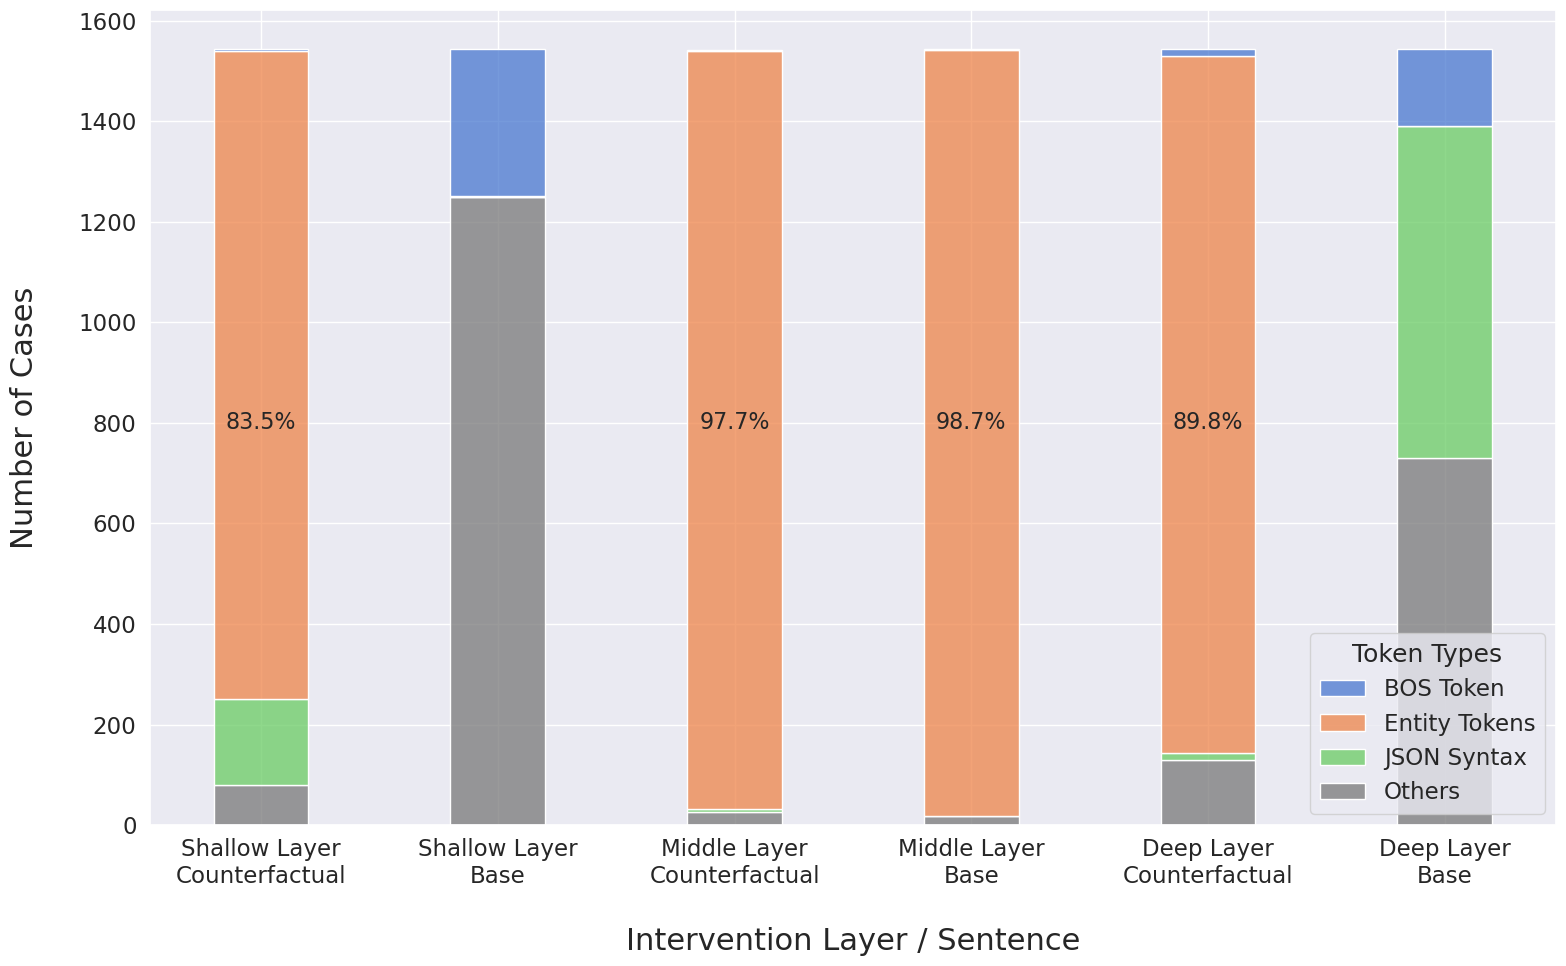

In [9]:
import itertools

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

all_colors = sns.color_palette("muted")
key_t_color = {
    "BOS Token": all_colors[0],
    "Entity Tokens": all_colors[1],
    # "Sentence Last Token": all_colors[2],
    "JSON Syntax": all_colors[2],
    "Others": all_colors[7],
    "Label": all_colors[5],
}

df = pd.DataFrame(columns=["Layer", "Type", "Location Type"])
for key, v in layer_7_source_data.items():
    if key == "Subject Tokens":
        key = "Entity Tokens"

    for _ in range(v):
        df.loc[len(df)] = ["7", key, "Shallow Layer\nCounterfactual"]

for key, v in layer_7_base_data.items():
    if key == "Subject Tokens":
        key = "Entity Tokens"

    if key == "Country":
        for _ in range(v):
            df.loc[len(df)] = ["7", "Others", "Shallow Layer\nBase"]
    else:
        for _ in range(v):
            df.loc[len(df)] = ["7", key, "Shallow Layer\nBase"]

for key, v in layer_15_source_data.items():
    if key == "Subject Tokens":
        key = "Entity Tokens"

    for _ in range(v):
        df.loc[len(df)] = ["15", key, "Middle Layer\nCounterfactual"]

for key, v in layer_15_base_data.items():
    if key == "Subject Tokens":
        key = "Entity Tokens"

    for _ in range(v):
        df.loc[len(df)] = ["15", key, "Middle Layer\nBase"]

for key, v in layer_29_source_data.items():
    if key == "Subject Tokens":
        key = "Entity Tokens"

    for _ in range(v):
        df.loc[len(df)] = ["29", key, "Deep Layer\nCounterfactual"]

for key, v in layer_29_base_data.items():
    if key == "Subject Tokens":
        key = "Entity Tokens"

    for _ in range(v):
        df.loc[len(df)] = ["29", key, "Deep Layer\nBase"]

df = df[df["Type"] != "Sentence Last Token"]
sns.set(font_scale=1.5)

fig, axes = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(
    data=df,
    x="Location Type",
    hue="Type",
    multiple="stack",
    palette=key_t_color,
    ax=axes,
    shrink=0.4,
)

# Show the percentage of the Type in each bar

for location in df["Location Type"].unique():
    sub_df = df[df["Location Type"] == location]
    # print(len(sub_df[sub_df["Type"] == "Subject Tokens"]) / len(sub_df))

# Move original legend to the upper right
legend = axes.get_legend()

# Set the location of the legend to the bottom right
legend.set_ncols(4)
# legend.set_bbox_to_anchor((1, 1.4))
legend.set_loc("lower right")
legend.set_title("Token Types")
legend.set_ncols(4)

# Arange four labels in legend horizontally instead of vertically


# Write '83.5%', '97.7%', '98.7%', and '89.8%' at the middel of the 1st, 3rd, 4th and 5th bar
axes.text(0, 800, "83.5%", ha="center", va="center", fontsize=16)
axes.text(2, 800, "97.7%", ha="center", va="center", fontsize=16)
axes.text(3, 800, "98.7%", ha="center", va="center", fontsize=16)
axes.text(4, 800, "89.8%", ha="center", va="center", fontsize=16)

axes.set_xlabel("\nIntervention Layer / Sentence", fontsize=22)
axes.set_ylabel("Number of Cases\n", fontsize=22)
# Display the plot
fig.tight_layout()
fig.savefig("layer_7_15_29_stat_first_version.pdf")

plt.show()